In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
import control as c
import sympy as sym
from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code
from fractions import Fraction
import matplotlib.patches as patches

## Dominant pole approximation

When studying the behaviour of systems, they are often approximated by a dominant pole or a pair of dominant complex poles. This example demonstrates this property.

A second-order system is defined by the following transfer function:

\begin{equation}
    G(s)=\frac{\alpha\beta}{(s+\alpha)(s+\beta)}=\frac{1}{(\frac{1}{\alpha}s+1)(\frac{1}{\beta}s+1)},
\end{equation}

where $\beta=1$ and $\alpha$ is iterable.

A third-order system is defined by the following transfer function:

\begin{equation}
    G(s)=\frac{\alpha{\omega_0}^2}{\big(s+\alpha\big)\big(s^2+2\zeta\omega_0s+\omega_0^2\big)}=\frac{1}{(\frac{1}{\alpha}s+1)(\frac{1}{\omega_0^2}s^2+\frac{2\zeta\alpha}{\omega_0}s+1)},
\end{equation}

where $\beta=1$, $\omega_0=4.1$ and $\zeta=0.24$ and $\alpha$ is iterable.

---

### How to use this notebook?

Toggle between the second- and third-order system and move the slider to change the location of the moveable pole $a$.

<sub>This notebook is based on the following [tutorial](https://lpsa.swarthmore.edu/PZXferStepBode/DomPole.html "The Dominant Pole Approximation") by Prof. Erik Cheever.

In [4]:
# System selector buttons
style = {'description_width': 'initial'}
typeSelect = widgets.ToggleButtons(
    options=[('second-order system', 0), ('third-order system', 1),],
    description='Select: ',style=style)

ToggleButtons(description='Select: ', options=(('second-order system', 0), ('third-order system', 1)), style=T…

<IPython.core.display.Javascript object>


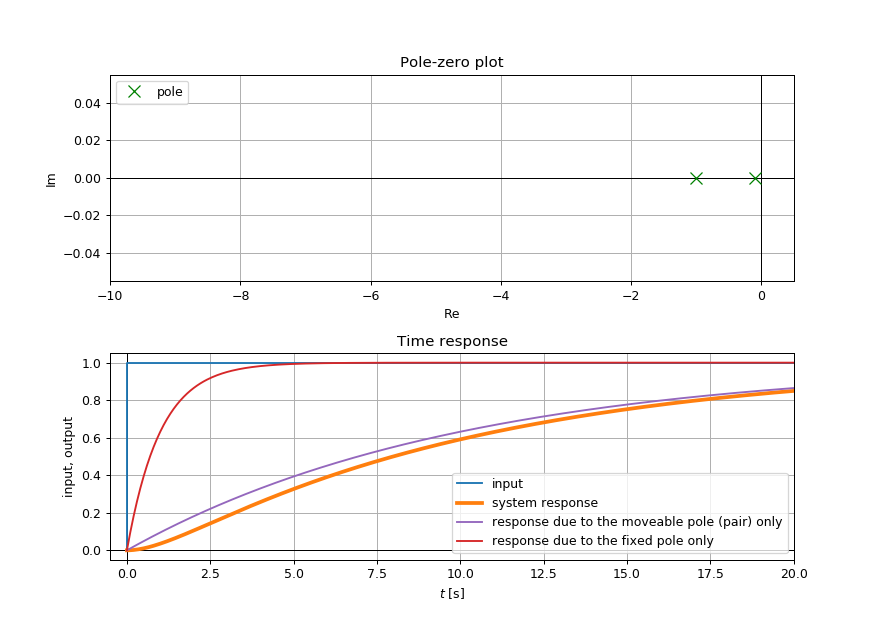

FloatSlider(value=0.1, continuous_update=False, description='$\\alpha$:', max=10.0, min=0.1)

Output()

In [5]:
display(typeSelect)
continuous_update=False

# set up plot 

fig, ax = plt.subplots(2,1,figsize=[9.8,7],num='Dominant pole approximation')
plt.subplots_adjust(hspace=0.35)
ax[0].grid(True)
ax[1].grid(True)
# ax[2].grid(which='both', axis='both', color='lightgray')
ax[0].axhline(y=0,color='k',lw=.8)
ax[1].axhline(y=0,color='k',lw=.8)
ax[0].axvline(x=0,color='k',lw=.8)
ax[1].axvline(x=0,color='k',lw=.8)
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')
ax[0].set_xlim([-10,0.5])
ax[1].set_xlim([-0.5,20])
ax[1].set_xlabel('$t$ [s]')
ax[1].set_ylabel('input, output')
ax[0].set_title('Pole-zero plot')
ax[1].set_title('Time response')

plotzero, = ax[0].plot([], [])
response, = ax[1].plot([], [])
responseAdom, = ax[1].plot([], [])
responseBdom, = ax[1].plot([], [])

ax[1].step([0,50],[0,1],color='C0',label='input')

# generate x values
  
def response_func(a,index):
    
    global plotzero, response, responseAdom, responseBdom 
#     global bodePlot, bodePlotAdom, bodePlotBdom

    t = np.linspace(0, 50, 1000)
    
    if index==0:
        b=1
        num=a*b
        den=([1,a+b,a*b])
        tf_sys=c.TransferFunction(num,den)
        poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
        tout, yout = c.step_response(tf_sys,t)
        den1=([1,a])
        tf_sys1=c.TransferFunction(a,den1)
        toutA, youtA = c.step_response(tf_sys1,t)
        den2=([1,b])
        tf_sys2=c.TransferFunction(b,den2)
        toutB, youtB = c.step_response(tf_sys2,t)
        mag, phase, omega = c.bode_plot(tf_sys, Plot=False)   # Bode-plot
        magA, phase, omegaA = c.bode_plot(tf_sys1, Plot=False)   # Bode-plot
        magB, phase, omegaB = c.bode_plot(tf_sys2, Plot=False)   # Bode-plot
        s=sym.Symbol('s')
        eq=(a*b/((s+a)*(s+b)))
        eq1=1/(((1/a)*s+1)*((1/b)*s+1))
        display(Markdown('Moveable pole (purple curve) $\\alpha$ is equal to %.1f, fixed pole (red curve) $b$ is equal to %i; The transfer function is equal to:'%(a,1)))
        display(eq),display(Markdown('or')),display(eq1)

    elif index==1:
        omega0=4.1
        zeta=0.24
        num=a*omega0**2
        den=([1,2*zeta*omega0+a,omega0**2+2*zeta*omega0*a,a*omega0**2])
        tf_sys=c.TransferFunction(num,den)
        poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
        tout, yout = c.step_response(tf_sys,t)
        den1=([1,a])
        tf_sys1=c.TransferFunction(a,den1)
        toutA, youtA = c.step_response(tf_sys1,t)
        den2=([1,2*zeta*omega0,omega0**2])
        tf_sys2=c.TransferFunction(omega0**2,den2)
        toutB, youtB = c.step_response(tf_sys2,t)
        mag, phase, omega = c.bode_plot(tf_sys, Plot=False)   # Bode-plot
        magA, phase, omegaA = c.bode_plot(tf_sys1, Plot=False)   # Bode-plot
        magB, phase, omegaB = c.bode_plot(tf_sys2, Plot=False)   # Bode-plot
        s=sym.Symbol('s')
        eq=(a*omega0**2/((s+a)*(s**2+2*zeta*omega0*s+omega0*omega0)))
        eq1=1/(((1/a)*s+1)*((1/(omega0*omega0))*s*s+(2*zeta*a/omega0)*s+1))
        
        display(Markdown('Moveable pole (purple curve) $\\alpha$ is equal to %.1f, fixed poles (red curve) $\\beta$ are equal to $1\pm4j$ ($\omega_0$ is set to 4.1, $\zeta$ is set to 0.24). The transfer function is equal to:'%(a)))
        display(eq),display(Markdown('or')),display(eq1)
    
    ax[0].lines.remove(plotzero)
    ax[1].lines.remove(response)
    ax[1].lines.remove(responseAdom)
    ax[1].lines.remove(responseBdom)
    
    plotzero, = ax[0].plot(np.real(poles_sys), np.imag(poles_sys), 'xg', markersize=10, label = 'pole')
    response, = ax[1].plot(tout,yout,color='C1',label='system response',lw=3)
    responseAdom, = ax[1].plot(toutA,youtA,color='C4',label='response due to the moveable pole (pair) only')
    responseBdom, = ax[1].plot(toutB,youtB,color='C3',label='response due to the fixed pole only')

    ax[0].legend()
    ax[1].legend()
    
a_slider=widgets.FloatSlider(value=0.1, min=0.1, max=10, step=.1,
                                        description='$\\alpha$:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)

input_data=widgets.interactive_output(response_func,{'a':a_slider,'index':typeSelect})

def update_slider(index):
    global a_slider
    
    aval=[0.1,0.1]
    a_slider.value=aval[index]    

input_data2=widgets.interactive_output(update_slider,{'index':typeSelect})

display(a_slider,input_data)
